Collaborative Filtering Systems (User-Based)

In [ ]:
! pip install numpy
! pip install scikit-surprise

import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Operational libraries
import sys
sys.path.append("..")

# ML libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import scipy.stats
# Visualization
import seaborn as sns
# Similarity
from sklearn.metrics.pairwise import cosine_similarity
import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# features = {"transaction_id","Account_id","transaction_amount","transaction_date","time_to_purchase","gas_type","gas_price_purchase","product_id","Location"}

In [ ]:
df = pd.DataFrame()
df = pd.read_csv(r'/content/transactions_master.csv')

# Print the first five rows
# NaN means missing data
df.head()

,transaction_date,time_to_purchase,transaction_id,account_id,age,register_date,transaction_amount,gas_type,gas_price_purchase,product_id,product_name,product_description,product_category,product_price,location_id,location_detail,latitude,longtitude
0,2023-01-01,06:00:00,843,1416,47.0,NaN,3.00,NaN,0.00,2,Croissant,Flaky and buttery pastry,Pastry,3.0,7,Sukhumvit,13.730524,100.567579
1,2023-01-01,06:00:00,1194,1109,36.0,2020-11-05,2.00,NaN,0.00,3,Tea,Tea with milk and sugar,Beverage,2.0,7,Sukhumvit,13.730524,100.567579
2,2023-01-01,06:00:00,2144,1184,62.0,2022-01-01,3.50,NaN,0.00,4,Muffin,Freshly baked muffin,Pastry,3.5,7,Sukhumvit,13.730524,100.567579
3,2023-01-01,06:00:00,3951,1156,43.0,2021-08-24,2.50,NaN,0.00,8,Espresso,Strong coffee shot,Beverage,2.5,7,Sukhumvit,13.730524,100.567579
4,2023-01-01,06:00:00,5197,1068,65.0,NaN,21.07,X,21.07,10,RedBull,RedBull,Beverage,4.0,7,Sukhumvit,13.730524,100.567579


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44500 entries, 0 to 44499
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_date     44500 non-null  object 
 1   time_to_purchase     44500 non-null  object 
 2   transaction_id       44500 non-null  int64  
 3   account_id           44500 non-null  int64  
 4   age                  37307 non-null  float64
 5   register_date        15029 non-null  object 
 6   transaction_amount   44500 non-null  float64
 7   gas_type             22155 non-null  object 
 8   gas_price_purchase   44500 non-null  float64
 9   product_id           44500 non-null  int64  
 10  product_name         44500 non-null  object 
 11  product_description  44500 non-null  object 
 12  product_category     44500 non-null  object 
 13  product_price        44500 non-null  float64
 14  location_id          44500 non-null  int64  
 15  location_detail      44500 non-null 

In [ ]:
categorical_features = ["transaction_date", "time_to_purchase", "transaction_id", "account_id", "register_date", "gas_type", "product_id",
                        "product_name", "product_description", "product_category", "location_id", "location_detail"]
numerical_features = ["age", "transaction_amount", "gas_price_purchase", "product_price", "latitude" , "longtitude"]

In [ ]:
imputer_numerical = SimpleImputer(strategy="mean")
imputer_categorical = SimpleImputer(strategy="constant", fill_value="missing")

In [ ]:
imputer_numerical.fit(df[numerical_features])
imputer_categorical.fit(df[categorical_features])

SimpleImputer(fill_value='missing', strategy='constant')

In [ ]:
df.head()

,transaction_date,time_to_purchase,transaction_id,account_id,age,register_date,transaction_amount,gas_type,gas_price_purchase,product_id,product_name,product_description,product_category,product_price,location_id,location_detail,latitude,longtitude
0,2023-01-01,06:00:00,843,1416,47.0,NaN,3.00,NaN,0.00,2,Croissant,Flaky and buttery pastry,Pastry,3.0,7,Sukhumvit,13.730524,100.567579
1,2023-01-01,06:00:00,1194,1109,36.0,2020-11-05,2.00,NaN,0.00,3,Tea,Tea with milk and sugar,Beverage,2.0,7,Sukhumvit,13.730524,100.567579
2,2023-01-01,06:00:00,2144,1184,62.0,2022-01-01,3.50,NaN,0.00,4,Muffin,Freshly baked muffin,Pastry,3.5,7,Sukhumvit,13.730524,100.567579
3,2023-01-01,06:00:00,3951,1156,43.0,2021-08-24,2.50,NaN,0.00,8,Espresso,Strong coffee shot,Beverage,2.5,7,Sukhumvit,13.730524,100.567579
4,2023-01-01,06:00:00,5197,1068,65.0,NaN,21.07,X,21.07,10,RedBull,RedBull,Beverage,4.0,7,Sukhumvit,13.730524,100.567579


In [ ]:
df_num = imputer_numerical.transform(df[numerical_features])
df_cat = imputer_categorical.transform(df[categorical_features].astype(str)) # make sure to cast all other categoricals as string

df = pd.concat([pd.DataFrame(df_num, columns = numerical_features),
pd.DataFrame(df_cat, columns = categorical_features)], axis = 1).copy(deep = True)

# change to int
for col in ("account_id", "transaction_id", "product_id", "location_id"):
  df[col] = df[col].astype("int64")

df["time_to_purchase"] = list(map(lambda x: str(x)[:-3], df["time_to_purchase"]))

df["dow"] = list(map(lambda x: ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"][datetime.date(*map(int,x.split("-"))).weekday()], df["transaction_date"]))

# Show missing values
df.isna().sum()

age                    0
transaction_amount     0
gas_price_purchase     0
product_price          0
latitude               0
longtitude             0
transaction_date       0
time_to_purchase       0
transaction_id         0
account_id             0
register_date          0
gas_type               0
product_id             0
product_name           0
product_description    0
product_category       0
location_id            0
location_detail        0
dow                    0
dtype: int64

In [ ]:
df.head()

,age,transaction_amount,gas_price_purchase,product_price,latitude,longtitude,transaction_date,time_to_purchase,transaction_id,account_id,register_date,gas_type,product_id,product_name,product_description,product_category,location_id,location_detail,dow
0,47.0,3.00,0.00,3.0,13.730524,100.567579,2023-01-01,06:00,843,1416,nan,nan,2,Croissant,Flaky and buttery pastry,Pastry,7,Sukhumvit,Sun
1,36.0,2.00,0.00,2.0,13.730524,100.567579,2023-01-01,06:00,1194,1109,2020-11-05,nan,3,Tea,Tea with milk and sugar,Beverage,7,Sukhumvit,Sun
2,62.0,3.50,0.00,3.5,13.730524,100.567579,2023-01-01,06:00,2144,1184,2022-01-01,nan,4,Muffin,Freshly baked muffin,Pastry,7,Sukhumvit,Sun
3,43.0,2.50,0.00,2.5,13.730524,100.567579,2023-01-01,06:00,3951,1156,2021-08-24,nan,8,Espresso,Strong coffee shot,Beverage,7,Sukhumvit,Sun
4,65.0,21.07,21.07,4.0,13.730524,100.567579,2023-01-01,06:00,5197,1068,nan,X,10,RedBull,RedBull,Beverage,7,Sukhumvit,Sun


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44500 entries, 0 to 44499
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  44500 non-null  float64
 1   transaction_amount   44500 non-null  float64
 2   gas_price_purchase   44500 non-null  float64
 3   product_price        44500 non-null  float64
 4   latitude             44500 non-null  float64
 5   longtitude           44500 non-null  float64
 6   transaction_date     44500 non-null  object 
 7   time_to_purchase     44500 non-null  object 
 8   transaction_id       44500 non-null  int64  
 9   account_id           44500 non-null  int64  
 10  register_date        44500 non-null  object 
 11  gas_type             44500 non-null  object 
 12  product_id           44500 non-null  int64  
 13  product_name         44500 non-null  object 
 14  product_description  44500 non-null  object 
 15  product_category     44500 non-null 

In [ ]:
# df.transaction_amount.unique()

array([ 3.  ,  2.  ,  3.5 , ..., 22.59, 51.04, 80.41])

In [ ]:
# df.gas_price_purchase.unique()

array([ 0.  , 21.07, 46.58, ..., 22.59, 51.04, 80.41])

In [ ]:
product_dict = {1:"Coffee",2:"Crossaint",3:"Tea",4:"Muffin",5:"Bagel",6:"Latte",7:"Cappuccino",8:"Espresso",9:"Hot Chocolate",10:"Redbull","A":"Gas A","B":"Gas B","X":"Gas X"}

<Axes: title={'center': 'Product Counts'}, xlabel='product_name', ylabel='count'>

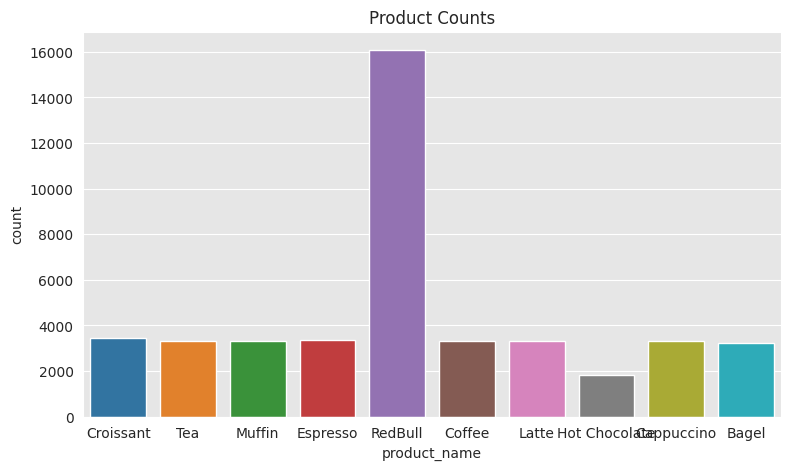

In [ ]:
plt.figure(figsize=(9, 5))
plt.title('Product Counts')
sns.countplot(x = df['product_name'], data = df["product_id"])

Redbull is sold for the most amount

<Axes: title={'center': 'Customers Visited Location'}, xlabel='location_id', ylabel='count'>

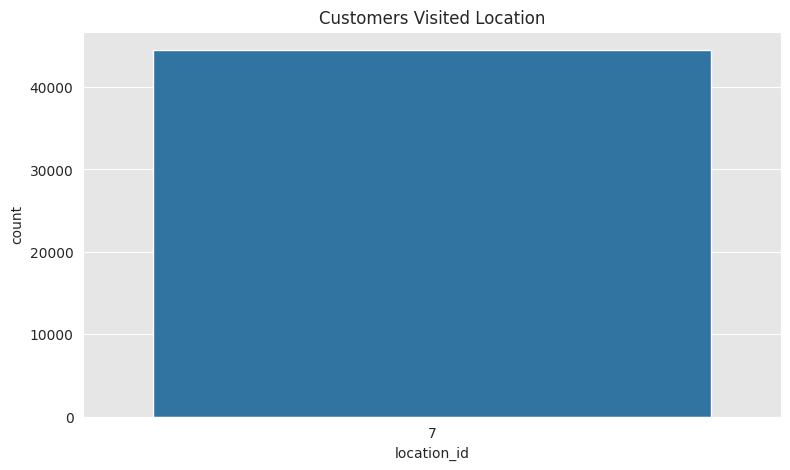

In [ ]:
plt.figure(figsize=(9, 5))
plt.title('Customers Visited Location')
sns.countplot(x = df['location_id'], data = df["location_id"])

<Axes: title={'center': 'Product Counts'}, xlabel='time_to_purchase', ylabel='count'>

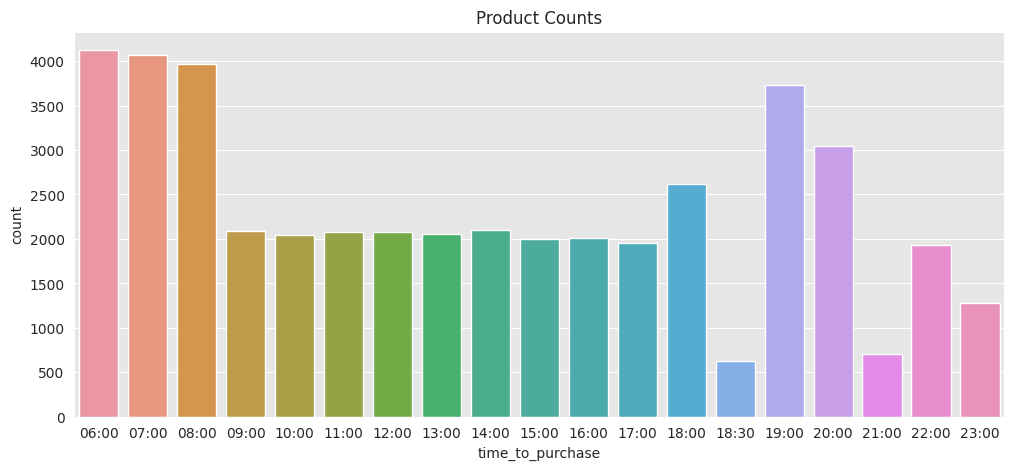

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Product Counts')
sns.countplot(x = df['time_to_purchase'], data = df["time_to_purchase"])

<Axes: title={'center': 'Product Counts'}, xlabel='transaction_date', ylabel='count'>

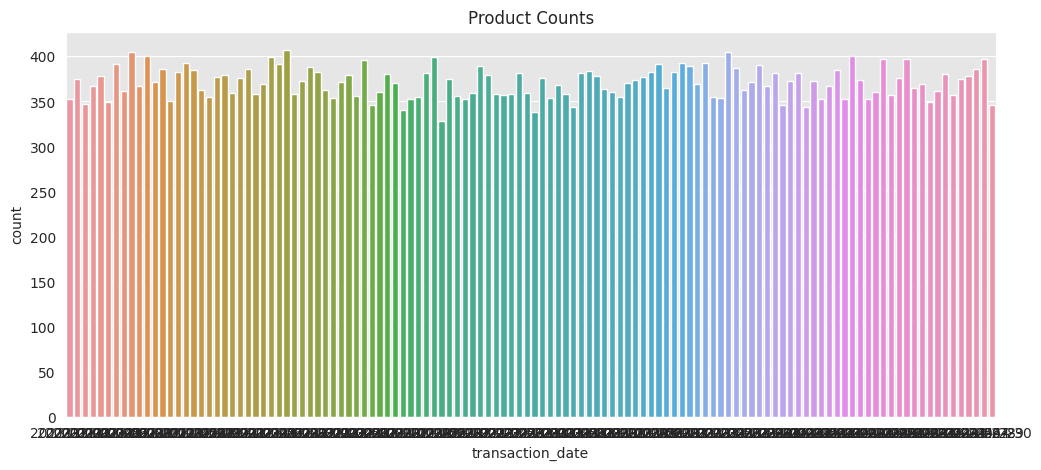

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Product Counts')
sns.countplot(x = df['transaction_date'], data = df["transaction_date"])

<Axes: title={'center': 'Product Counts'}, xlabel='dow', ylabel='count'>

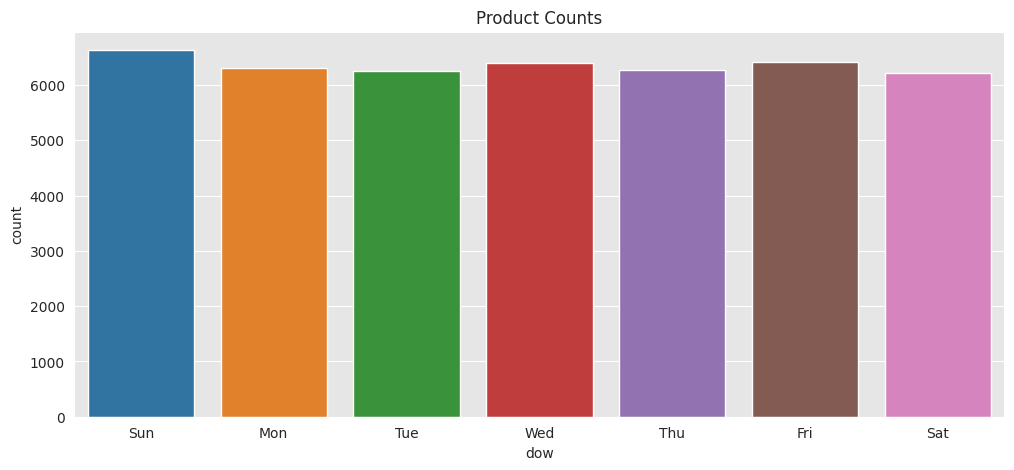

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Product Counts')
sns.countplot(x = df['dow'], data = df["dow"])

## **COSINE SIMILARITY MATRIX**

In [ ]:
df.insert(0, "quantity", [1]*44500, True)

### **Product only**

In [ ]:
df.head()

,quantity,age,transaction_amount,gas_price_purchase,product_price,latitude,longtitude,transaction_date,time_to_purchase,transaction_id,account_id,register_date,gas_type,product_id,product_name,product_description,product_category,location_id,location_detail
0,1,47.0,3.00,0.00,3.0,13.730524,100.567579,2023-01-01,06:00,843,1416,nan,nan,2,Croissant,Flaky and buttery pastry,Pastry,7,Sukhumvit
1,1,36.0,2.00,0.00,2.0,13.730524,100.567579,2023-01-01,06:00,1194,1109,2020-11-05,nan,3,Tea,Tea with milk and sugar,Beverage,7,Sukhumvit
2,1,62.0,3.50,0.00,3.5,13.730524,100.567579,2023-01-01,06:00,2144,1184,2022-01-01,nan,4,Muffin,Freshly baked muffin,Pastry,7,Sukhumvit
3,1,43.0,2.50,0.00,2.5,13.730524,100.567579,2023-01-01,06:00,3951,1156,2021-08-24,nan,8,Espresso,Strong coffee shot,Beverage,7,Sukhumvit
4,1,65.0,21.07,21.07,4.0,13.730524,100.567579,2023-01-01,06:00,5197,1068,nan,X,10,RedBull,RedBull,Beverage,7,Sukhumvit


In [ ]:
customer_item_matrix = df.pivot_table(
    index='account_id',
    columns='product_id',
    values= 'quantity',
    aggfunc='sum'
)

In [ ]:
customer_item_matrix

product_id,1,2,3,4,5,6,7,8,9,10
account_id,,,,,,,,,,
1001,NaN,3.0,9.0,3.0,7.0,4.0,5.0,5.0,1.0,9.0
1002,5.0,3.0,4.0,6.0,5.0,4.0,3.0,4.0,NaN,10.0
1003,3.0,1.0,7.0,2.0,4.0,5.0,4.0,4.0,1.0,13.0
1004,3.0,2.0,6.0,6.0,4.0,2.0,5.0,1.0,2.0,9.0
1005,5.0,7.0,6.0,5.0,2.0,1.0,2.0,4.0,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...
2996,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,4.0
2997,2.0,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,9.0
2998,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,5.0


In [ ]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: int(x) if x > 0 else 0)

In [ ]:
customer_item_matrix

product_id,1,2,3,4,5,6,7,8,9,10
account_id,,,,,,,,,,
1001,0,3,9,3,7,4,5,5,1,9
1002,5,3,4,6,5,4,3,4,0,10
1003,3,1,7,2,4,5,4,4,1,13
1004,3,2,6,6,4,2,5,1,2,9
1005,5,7,6,5,2,1,2,4,0,13
...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,2,0,2,0,0,4
2997,2,1,0,0,0,1,2,0,0,9
2998,1,0,1,1,0,1,0,1,1,5


In [ ]:
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix)
)

In [ ]:
user_user_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1.000000,0.875088,0.923715,0.897745,0.817140,0.842332,0.810036,0.823530,0.906732,0.899918,...,0.545869,0.617783,0.540692,0.521967,0.507495,0.711868,0.597117,0.699436,0.714828,0.615921
1,0.875088,1.000000,0.921890,0.934393,0.923812,0.934442,0.902409,0.879964,0.919714,0.926557,...,0.676123,0.700332,0.758914,0.656216,0.687524,0.720082,0.746204,0.825927,0.718381,0.758043
2,0.923715,0.921890,1.000000,0.910182,0.882469,0.910518,0.841156,0.859396,0.956581,0.905517,...,0.664703,0.789188,0.767163,0.728982,0.762566,0.793492,0.820992,0.893260,0.882010,0.831655
3,0.897745,0.934393,0.910182,1.000000,0.885293,0.874428,0.917377,0.841844,0.857321,0.907604,...,0.608581,0.689944,0.726335,0.659912,0.643596,0.750000,0.720400,0.794339,0.775940,0.635471
4,0.817140,0.923812,0.882469,0.885293,1.000000,0.919570,0.957742,0.916828,0.863731,0.866725,...,0.517769,0.774573,0.840752,0.762451,0.762171,0.675224,0.803334,0.851569,0.751998,0.782255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.711868,0.720082,0.793492,0.750000,0.675224,0.809311,0.608645,0.597438,0.789280,0.632082,...,0.547723,0.897758,0.747087,0.733236,0.792118,1.000000,0.855921,0.733236,0.821584,0.733236
1996,0.597117,0.746204,0.820992,0.720400,0.803334,0.809750,0.720272,0.718228,0.796696,0.655457,...,0.562569,0.960513,0.943185,0.903732,0.966136,0.855921,1.000000,0.903732,0.914174,0.903732
1997,0.699436,0.825927,0.893260,0.794339,0.851569,0.871707,0.768377,0.728777,0.850132,0.716588,...,0.642575,0.877691,0.931245,0.903226,0.914774,0.733236,0.903732,1.000000,0.923702,0.935484
1998,0.714828,0.718381,0.882010,0.775940,0.751998,0.764272,0.710220,0.699083,0.834799,0.692411,...,0.600000,0.901491,0.852493,0.883541,0.867722,0.821584,0.914174,0.923702,1.000000,0.843380


In [ ]:
user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['account_id'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('account_id')

In [ ]:
user_user_sim_matrix

account_id,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
account_id,,,,,,,,,,,,,,,,,,,,,
1001,1.000000,0.875088,0.923715,0.897745,0.817140,0.842332,0.810036,0.823530,0.906732,0.899918,...,0.545869,0.617783,0.540692,0.521967,0.507495,0.711868,0.597117,0.699436,0.714828,0.615921
1002,0.875088,1.000000,0.921890,0.934393,0.923812,0.934442,0.902409,0.879964,0.919714,0.926557,...,0.676123,0.700332,0.758914,0.656216,0.687524,0.720082,0.746204,0.825927,0.718381,0.758043
1003,0.923715,0.921890,1.000000,0.910182,0.882469,0.910518,0.841156,0.859396,0.956581,0.905517,...,0.664703,0.789188,0.767163,0.728982,0.762566,0.793492,0.820992,0.893260,0.882010,0.831655
1004,0.897745,0.934393,0.910182,1.000000,0.885293,0.874428,0.917377,0.841844,0.857321,0.907604,...,0.608581,0.689944,0.726335,0.659912,0.643596,0.750000,0.720400,0.794339,0.775940,0.635471
1005,0.817140,0.923812,0.882469,0.885293,1.000000,0.919570,0.957742,0.916828,0.863731,0.866725,...,0.517769,0.774573,0.840752,0.762451,0.762171,0.675224,0.803334,0.851569,0.751998,0.782255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.711868,0.720082,0.793492,0.750000,0.675224,0.809311,0.608645,0.597438,0.789280,0.632082,...,0.547723,0.897758,0.747087,0.733236,0.792118,1.000000,0.855921,0.733236,0.821584,0.733236
2997,0.597117,0.746204,0.820992,0.720400,0.803334,0.809750,0.720272,0.718228,0.796696,0.655457,...,0.562569,0.960513,0.943185,0.903732,0.966136,0.855921,1.000000,0.903732,0.914174,0.903732
2998,0.699436,0.825927,0.893260,0.794339,0.851569,0.871707,0.768377,0.728777,0.850132,0.716588,...,0.642575,0.877691,0.931245,0.903226,0.914774,0.733236,0.903732,1.000000,0.923702,0.935484


In [ ]:
user_user_sim_matrix.loc[1001].sort_values(ascending=False)

account_id
1001    1.000000
1427    0.978991
1054    0.961418
1392    0.958756
1474    0.958262
          ...   
2544    0.369898
2929    0.337919
2855    0.234905
2796    0.174371
2866    0.161206
Name: 1001, Length: 2000, dtype: float64

In [ ]:
items_bought_by_1001 = set(customer_item_matrix.loc[1001].iloc[
    customer_item_matrix.loc[1001].to_numpy().nonzero()
].index)

In [ ]:
product  = set(())
for i in items_bought_by_1001:
  product.add(product_dict[i])
product

{'Bagel',
 'Cappuccino',
 'Crossaint',
 'Espresso',
 'Hot Chocolate',
 'Latte',
 'Muffin',
 'Redbull',
 'Tea'}

In [ ]:
items_bought_by_2336 = set(customer_item_matrix.loc[2336].iloc[
    customer_item_matrix.loc[2336].to_numpy().nonzero()
].index)

In [ ]:
items_bought_by_2336

{1, 10}

In [ ]:
product2  = set(())
for i in items_bought_by_2336:
  product2.add(product_dict[i])
product2

{'Coffee', 'Redbull'}

In [ ]:
items_to_recommend_to_2336 = items_bought_by_1001 - items_bought_by_2336

In [ ]:
items_to_recommend_to_2336

{2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
product_rec  = set(())
for i in items_to_recommend_to_2336:
  product_rec.add(product_dict[i])
product_rec

{'Bagel',
 'Cappuccino',
 'Crossaint',
 'Espresso',
 'Hot Chocolate',
 'Latte',
 'Muffin',
 'Tea'}

In [ ]:
from sklearn.neighbors import NearestNeighbors
for id in range (1001,3001):
  df1 = customer_item_matrix.copy().transpose()
  df2 = customer_item_matrix.copy().transpose()
  # find the nearest neighbors using NearestNeighbors(n_neighbors=3)
  number_neighbors = 3
  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(df1.values)
  distances, indices = knn.kneighbors(df1.values, n_neighbors=number_neighbors)

  # convert user_name to user_index
  user_index = df1.columns.tolist().index(id)

  # t: product_title, m: the row number of t in df
  for m,t in list(enumerate(df1.index)):

    # find movies without ratings by user_4
    if df1.iloc[m, user_index] == 0:
      sim_product = indices[m].tolist()
      product_distances = distances[m].tolist()

      # Generally, this is the case: indices[3] = [3 6 7]. The movie itself is in the first place.
      # In this case, we take off 3 from the list. Then, indices[3] == [6 7] to have the nearest NEIGHBORS in the list.
      if m in sim_product:
        id_product = sim_product.index(m)
        sim_product.remove(m)
        product_distances.pop(id_product)

      # However, if the percentage of ratings in the dataset is very low, there are too many 0s in the dataset.
      # Some movies have all 0 ratings and the movies with all 0s are considered the same movies by NearestNeighbors().
      # Then,even the movie itself cannot be included in the indices.
      # For example, indices[3] = [2 4 7] is possible if movie_2, movie_3, movie_4, and movie_7 have all 0s for their ratings.
      # In that case, we take off the farthest movie in the list. Therefore, 7 is taken off from the list, then indices[3] == [2 4].
      else:
        sim_product = sim_product[:n_neighbors-1]
        product_distance = product_distance[:n_neighbors-1]

      #product_similarty = 1 - product_distance
      product_similarity = [1-x for x in product_distances]
      product_similarity_copy = product_similarity.copy()
      nominator = 0

      # for each similar product
      for s in range(0, len(product_similarity)):

        # check if the rating of a similar movie is zero
        if df1.iloc[sim_product[s], user_index] == 0:

          # if the rating is zero, ignore the rating and the similarity in calculating the predicted rating
          if len(product_similarity_copy) == (number_neighbors - 1):
            product_similarity_copy.pop(s)

          else:
            product_similarity_copy.pop(s-(len(product_similarity)-len(product_similarity_copy)))

        # if the rating is not zero, use the rating and similarity in the calculation
        else:
          nominator = nominator + product_similarity[s]*df1.iloc[sim_product[s],user_index]

      # check if the number of the ratings with non-zero is positive
      if len(product_similarity_copy) > 0:

        # check if the sum of the ratings of the similar product is positive.
        if sum(product_similarity_copy) > 0:
          predicted_r = nominator/sum(product_similarity_copy)

        # Even if there are some product for which the ratings are positive, some movies have zero similarity even though they are selected as similar movies.
        # in this case, the predicted rating becomes zero as well
        else:
          predicted_r = 0

      # if all the ratings of the similar movies are zero, then predicted rating should be zero
      else:
        predicted_r = 0

    # place the predicted rating into the copy of the original dataset
      df2.iloc[m,user_index] = predicted_r

In [ ]:
def recommend_product(user, num_recommended_product):

  print('The list of the product {} Has bought \n'.format(user))

  for m in df1[df1[user] > 0][user].index.tolist():
    print(m)

  print('\n')

  recommended_product = []

  for m in df1[df1[user] == 0].index.tolist():

    index_df1 = df1.index.tolist().index(m)
    predicted_rating = df2.iloc[index_df1, df2.columns.tolist().index(user)]
    recommended_product.append((m, predicted_rating))

  sorted_rm = sorted(recommended_product, key=lambda x:x[1], reverse=True)

  print('The list of the Recommended Products \n')
  rank = 1
  for recommended_product in sorted_rm[:num_recommended_product]:

    print('{}: {} - predicted rating:{}'.format(rank, recommended_product[0], recommended_product[1]))
    rank = rank + 1

In [ ]:
recommend_product(1002, 5)

The list of the product 1002 Has bought 

1
2
3
4
5
6
7
8
10


The list of the Recommended Products 

1: 9 - predicted rating:0


### **Including Gas Type, Day of Week, and Time**

In [ ]:
df.head()

,quantity,age,transaction_amount,gas_price_purchase,product_price,latitude,longtitude,transaction_date,time_to_purchase,transaction_id,account_id,register_date,gas_type,product_id,product_name,product_description,product_category,location_id,location_detail,dow
0,1,47.0,3.00,0.00,3.0,13.730524,100.567579,2023-01-01,06:00,843,1416,nan,nan,2,Croissant,Flaky and buttery pastry,Pastry,7,Sukhumvit,Sun
1,1,36.0,2.00,0.00,2.0,13.730524,100.567579,2023-01-01,06:00,1194,1109,2020-11-05,nan,3,Tea,Tea with milk and sugar,Beverage,7,Sukhumvit,Sun
2,1,62.0,3.50,0.00,3.5,13.730524,100.567579,2023-01-01,06:00,2144,1184,2022-01-01,nan,4,Muffin,Freshly baked muffin,Pastry,7,Sukhumvit,Sun
3,1,43.0,2.50,0.00,2.5,13.730524,100.567579,2023-01-01,06:00,3951,1156,2021-08-24,nan,8,Espresso,Strong coffee shot,Beverage,7,Sukhumvit,Sun
4,1,65.0,21.07,21.07,4.0,13.730524,100.567579,2023-01-01,06:00,5197,1068,nan,X,10,RedBull,RedBull,Beverage,7,Sukhumvit,Sun


In [ ]:
customer_matrix_product = df.pivot_table(
    index='account_id',
    columns='product_id',
    values='quantity',
    aggfunc='sum'
)

In [ ]:
customer_matrix_product

product_id,1,2,3,4,5,6,7,8,9,10
account_id,,,,,,,,,,
1001,NaN,3.0,9.0,3.0,7.0,4.0,5.0,5.0,1.0,9.0
1002,5.0,3.0,4.0,6.0,5.0,4.0,3.0,4.0,NaN,10.0
1003,3.0,1.0,7.0,2.0,4.0,5.0,4.0,4.0,1.0,13.0
1004,3.0,2.0,6.0,6.0,4.0,2.0,5.0,1.0,2.0,9.0
1005,5.0,7.0,6.0,5.0,2.0,1.0,2.0,4.0,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...
2996,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,4.0
2997,2.0,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,9.0
2998,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,5.0


In [ ]:
customer_matrix_time= df.pivot_table(
    index='account_id',
    columns='time_to_purchase',
    values='quantity',
    aggfunc='sum'
)

In [ ]:
customer_matrix_time

time_to_purchase,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,18:30,19:00,20:00,21:00,22:00,23:00
account_id,,,,,,,,,,,,,,,,,,,
1001,4.0,5.0,1.0,NaN,4.0,2.0,4.0,5.0,2.0,3.0,4.0,2.0,NaN,NaN,3.0,5.0,1.0,1.0,NaN
1002,7.0,2.0,6.0,4.0,2.0,1.0,3.0,1.0,3.0,2.0,1.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN
1003,3.0,4.0,5.0,1.0,3.0,2.0,3.0,NaN,5.0,1.0,3.0,2.0,3.0,NaN,5.0,3.0,1.0,NaN,NaN
1004,3.0,2.0,NaN,6.0,2.0,1.0,NaN,7.0,4.0,NaN,4.0,4.0,NaN,NaN,4.0,NaN,1.0,2.0,NaN
1005,4.0,6.0,1.0,2.0,2.0,5.0,4.0,2.0,3.0,4.0,4.0,1.0,NaN,NaN,1.0,2.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0
2997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4.0
2998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0


In [ ]:
customer_matrix_gas = df.pivot_table(
    index='account_id',
    columns='gas_type',
    values='quantity',
    aggfunc='sum'
)

In [ ]:
customer_matrix_gas

gas_type,A,B,X,nan
account_id,,,,
1001,9.0,9.0,5.0,23.0
1002,12.0,8.0,4.0,20.0
1003,7.0,5.0,9.0,23.0
1004,10.0,4.0,5.0,21.0
1005,9.0,8.0,12.0,16.0
...,...,...,...,...
2996,3.0,NaN,1.0,4.0
2997,2.0,5.0,2.0,6.0
2998,3.0,1.0,1.0,6.0


In [ ]:
customer_matrix_dow= df.pivot_table(
    index='account_id',
    columns='dow',
    values='quantity',
    aggfunc='sum'
)

In [ ]:
customer_matrix_dow

dow,Fri,Mon,Sat,Sun,Thu,Tue,Wed
account_id,,,,,,,
1001,5.0,10.0,12.0,5.0,3.0,3.0,8.0
1002,4.0,6.0,7.0,9.0,5.0,10.0,3.0
1003,6.0,8.0,7.0,8.0,3.0,6.0,6.0
1004,6.0,6.0,3.0,4.0,3.0,10.0,8.0
1005,11.0,4.0,7.0,8.0,7.0,4.0,4.0
...,...,...,...,...,...,...,...
2996,2.0,1.0,NaN,1.0,1.0,2.0,1.0
2997,4.0,3.0,NaN,3.0,3.0,1.0,1.0
2998,1.0,1.0,NaN,2.0,1.0,4.0,2.0


In [ ]:
customer_matrix_master = pd.concat([customer_matrix_product, customer_matrix_time, customer_matrix_dow, customer_matrix_gas],axis=1)

In [ ]:
customer_matrix_master

,1,2,3,4,5,6,7,8,9,10,...,Mon,Sat,Sun,Thu,Tue,Wed,A,B,X,nan
account_id,,,,,,,,,,,,,,,,,,,,,
1001,NaN,3.0,9.0,3.0,7.0,4.0,5.0,5.0,1.0,9.0,...,10.0,12.0,5.0,3.0,3.0,8.0,9.0,9.0,5.0,23.0
1002,5.0,3.0,4.0,6.0,5.0,4.0,3.0,4.0,NaN,10.0,...,6.0,7.0,9.0,5.0,10.0,3.0,12.0,8.0,4.0,20.0
1003,3.0,1.0,7.0,2.0,4.0,5.0,4.0,4.0,1.0,13.0,...,8.0,7.0,8.0,3.0,6.0,6.0,7.0,5.0,9.0,23.0
1004,3.0,2.0,6.0,6.0,4.0,2.0,5.0,1.0,2.0,9.0,...,6.0,3.0,4.0,3.0,10.0,8.0,10.0,4.0,5.0,21.0
1005,5.0,7.0,6.0,5.0,2.0,1.0,2.0,4.0,NaN,13.0,...,4.0,7.0,8.0,7.0,4.0,4.0,9.0,8.0,12.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,4.0,...,1.0,NaN,1.0,1.0,2.0,1.0,3.0,NaN,1.0,4.0
2997,2.0,1.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,9.0,...,3.0,NaN,3.0,3.0,1.0,1.0,2.0,5.0,2.0,6.0
2998,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,5.0,...,1.0,NaN,2.0,1.0,4.0,2.0,3.0,1.0,1.0,6.0


In [ ]:
customer_matrix_master = customer_matrix_master.applymap(lambda x: int(x) if x > 0 else 0)

In [ ]:
customer_matrix_master

,1,2,3,4,5,6,7,8,9,10,...,Mon,Sat,Sun,Thu,Tue,Wed,A,B,X,nan
account_id,,,,,,,,,,,,,,,,,,,,,
1001,0,3,9,3,7,4,5,5,1,9,...,10,12,5,3,3,8,9,9,5,23
1002,5,3,4,6,5,4,3,4,0,10,...,6,7,9,5,10,3,12,8,4,20
1003,3,1,7,2,4,5,4,4,1,13,...,8,7,8,3,6,6,7,5,9,23
1004,3,2,6,6,4,2,5,1,2,9,...,6,3,4,3,10,8,10,4,5,21
1005,5,7,6,5,2,1,2,4,0,13,...,4,7,8,7,4,4,9,8,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,2,0,2,0,0,4,...,1,0,1,1,2,1,3,0,1,4
2997,2,1,0,0,0,1,2,0,0,9,...,3,0,3,3,1,1,2,5,2,6
2998,1,0,1,1,0,1,0,1,1,5,...,1,0,2,1,4,2,3,1,1,6


In [ ]:
customer_cossim_matrix_master = pd.DataFrame(
    cosine_similarity(customer_matrix_master)
)

In [ ]:
customer_cossim_matrix_master.columns = customer_matrix_master.index
customer_cossim_matrix_master['account_id'] = customer_matrix_master.index
customer_cossim_matrix_master = customer_cossim_matrix_master.set_index('account_id')

In [ ]:
customer_cossim_matrix_master

account_id,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
account_id,,,,,,,,,,,,,,,,,,,,,
1001,1.000000,0.887569,0.930078,0.880052,0.865883,0.873488,0.909893,0.878393,0.897360,0.921449,...,0.616493,0.515412,0.555360,0.531412,0.507963,0.571574,0.554472,0.605249,0.665188,0.585340
1002,0.887569,1.000000,0.925961,0.901305,0.879335,0.875385,0.910808,0.854392,0.926410,0.899873,...,0.636419,0.541986,0.608852,0.590857,0.537789,0.616662,0.595599,0.688137,0.601110,0.611080
1003,0.930078,0.925961,1.000000,0.896530,0.895536,0.938801,0.932160,0.876826,0.945836,0.944553,...,0.641667,0.566575,0.617764,0.625889,0.509686,0.623615,0.605612,0.672916,0.670370,0.658176
1004,0.880052,0.901305,0.896530,1.000000,0.838279,0.887440,0.901399,0.831633,0.876256,0.894047,...,0.651069,0.505080,0.588661,0.577751,0.467276,0.646721,0.583525,0.707522,0.636552,0.603804
1005,0.865883,0.879335,0.895536,0.838279,1.000000,0.878497,0.871922,0.839654,0.913839,0.866078,...,0.539033,0.637765,0.670987,0.652582,0.558457,0.589383,0.655450,0.636302,0.614946,0.680793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.571574,0.616662,0.623615,0.646721,0.589383,0.621936,0.556663,0.500402,0.635180,0.578850,...,0.720158,0.770901,0.888159,0.802124,0.714577,1.000000,0.738866,0.860724,0.763902,0.827396
2997,0.554472,0.595599,0.605612,0.583525,0.655450,0.569465,0.589099,0.590874,0.633063,0.614103,...,0.795133,0.872906,0.807041,0.851220,0.803903,0.738866,1.000000,0.860373,0.913289,0.923795
2998,0.605249,0.688137,0.672916,0.707522,0.636302,0.659728,0.661837,0.593679,0.664698,0.643425,...,0.871313,0.792782,0.860017,0.885986,0.739383,0.860724,0.860373,1.000000,0.873928,0.893591


In [ ]:
def get_bought_product(x, matrix):
  l = []
  bought_by_X = list(customer_matrix_master.loc[x].iloc[
    customer_matrix_master.loc[x].to_numpy().nonzero()].index)

  for item in bought_by_X:

    if item in range(1,11):
      l.append(product_dict[item])
  return l

In [ ]:
x = int(input("Please Select Customers ID to recommend: "))
rank = customer_cossim_matrix_master.loc[x].sort_values(ascending=False)

items_bought_by_X = get_bought_product(x, customer_matrix_master)
print(f"Bought by {x}: {', '.join(items_bought_by_X)}")

if items_bought_by_X == list(range(1,11)):
  print("You have try all of our products")
  item_recommend = [product_dict[np.argmax(customer_matrix_master.loc[x][:10]) + 1]]

else:

  for next_rank in range(1,1999):
    items_bought_by_Otherrank = get_bought_product(rank.index[next_rank], customer_matrix_master)
    item_recommend = [item for item in items_bought_by_Otherrank if item not in items_bought_by_X]

    if len(item_recommend) != 0:
      print(f"Recommending products by {rank.index[next_rank]}....")
      print(f"Bought by {rank.index[next_rank]}: {', '.join(items_bought_by_Otherrank)}")
      break

  else:
    print("Can't find product from others customer to recommend")
    item_recommend = [product_dict[np.argmax(customer_matrix_master.loc[x][:10]) + 1]]

print(f"I would like to recommend you: {', '.join(item_recommend)}")



Please Select Customers ID to recommend: 1001
Bought by 1001: Crossaint, Tea, Muffin, Bagel, Latte, Cappuccino, Espresso, Hot Chocolate, Redbull
Recommending products by 1423....
Bought by 1423: Coffee, Crossaint, Tea, Muffin, Bagel, Latte, Cappuccino, Espresso, Hot Chocolate, Redbull
I would like to recommend you: Coffee


### **Hot Product**

In [ ]:
df_filtered = df[df["transaction_amount"] != df["gas_price_purchase"]]

In [ ]:
df_filtered

,quantity,age,transaction_amount,gas_price_purchase,product_price,latitude,longtitude,transaction_date,time_to_purchase,transaction_id,account_id,register_date,gas_type,product_id,product_name,product_description,product_category,location_id,location_detail,dow
0,1,47.000000,3.0,0.0,3.0,13.730524,100.567579,2023-01-01,06:00,843,1416,nan,nan,2,Croissant,Flaky and buttery pastry,Pastry,7,Sukhumvit,Sun
1,1,36.000000,2.0,0.0,2.0,13.730524,100.567579,2023-01-01,06:00,1194,1109,2020-11-05,nan,3,Tea,Tea with milk and sugar,Beverage,7,Sukhumvit,Sun
2,1,62.000000,3.5,0.0,3.5,13.730524,100.567579,2023-01-01,06:00,2144,1184,2022-01-01,nan,4,Muffin,Freshly baked muffin,Pastry,7,Sukhumvit,Sun
3,1,43.000000,2.5,0.0,2.5,13.730524,100.567579,2023-01-01,06:00,3951,1156,2021-08-24,nan,8,Espresso,Strong coffee shot,Beverage,7,Sukhumvit,Sun
6,1,22.000000,2.5,0.0,2.5,13.730524,100.567579,2023-01-01,06:00,10126,1728,2020-11-23,nan,1,Coffee,Hot brewed coffee,Beverage,7,Sukhumvit,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44487,1,52.000000,2.0,0.0,2.0,13.730524,100.567579,2023-04-30,22:00,36445,1201,nan,nan,3,Tea,Tea with milk and sugar,Beverage,7,Sukhumvit,Sun
44491,1,18.000000,3.0,0.0,3.0,13.730524,100.567579,2023-04-30,22:00,39699,1322,nan,nan,5,Bagel,Toasted bagel with cream cheese,Pastry,7,Sukhumvit,Sun
44492,1,54.000000,3.5,0.0,3.5,13.730524,100.567579,2023-04-30,22:00,42373,1301,nan,nan,7,Cappuccino,Coffee with foamed milk,Beverage,7,Sukhumvit,Sun
44493,1,41.184094,2.0,0.0,2.0,13.730524,100.567579,2023-04-30,23:00,30276,2894,nan,nan,3,Tea,Tea with milk and sugar,Beverage,7,Sukhumvit,Sun


In [ ]:
def get_hot_sale(time, dow):
  df_new = df_filtered.copy()
  df_new = df_new[df_new["time_to_purchase"] == f"{str(time).zfill(2)}:00"][df_new["dow"] == "Sun"]
  df_new
  df_new =df_new['product_id'].value_counts()
  return product_dict[df_new.index[0]]

In [ ]:
time = 13 #@param {type:"slider", min:6, max:23, step:1}
dow = "Thu" #@param ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

print(f"Hot Product : {get_hot_sale(time, dow)}")

Hot Product : Crossaint
